# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다
------------------------------------------------------------

### (1) 필요한 모듈 import하기
Scikit-learn 라이브러리에서 필요한 모듈을 임포트한다. (데이터 준비부터 모델학습까지)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### (2) 데이터 준비
Scikit-learn 라이브러리의 dataset인 load_digits를 임포트해서 digits 데이터를 가져온다.

In [2]:
digits = load_digits()

### (3) 데이터 이해하기

##### (3)_1 Feature Data 지정하기 (Feature Data = 문제지, 변수 x로 표현, 입력받는 특징 데이터, digits_data)

- digits_data 변수에 feature 데이터 담고, 데이터 크기 확인하기

In [3]:
digits_data = digits.data
print(digits_data.shape)

(1797, 64)


- 데이터 구조 확인 (2차원 배열의 테이블 형태)

In [4]:
digits_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

이미지의 생김새를 확인하기

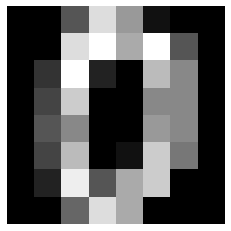

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

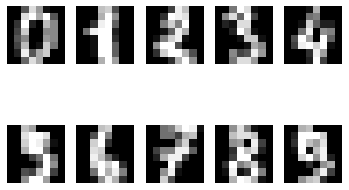

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

##### (3)_2 Label Data 지정하기 (=Target Data, 변수 y로 표현, 모델이 맞추어야 하는 정답값, digits_label)

In [8]:
digits_label = digits.target
print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

##### (3)_3 Target Names 출력해 보기 (=Label 이름)

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

##### (3)_4 데이터 Describe 해 보기

In [10]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### (4) train, test 데이터 분리

- pandas로 데이터프레임 살펴보기

In [11]:
import pandas as pd

digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


- Label 데이터 = 정답지, label 데이터를 추가해서 label 구성 알아보기

In [12]:
digits_df["label"] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


##### - Training용 데이터와 Test용 데이터를 분리한다. (Scikit-learn의 train_test_split 함수 사용)
- 훈련용 데이터와 테스트용 데이터를 8:2 비율로 나눈다. (test_size=0.2)
- 데이터를 편향되지 않게 분리하기 위해 랜덤 인자를 사용한다. (random_state=7)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=7)
print('X_train: ', len(X_train), '개 (Training용 feature 특징 데이터), ', 'X_test: ', len(X_test), '개 (Test용 feature 특징 데이터)')
print('y_train: ', len(y_train), '개 (Training용 label 정답 데이터), ', 'y_test: ', len(y_test), '개 (Test용 label 정답 데이터)')

X_train:  1437 개 (Training용 feature 특징 데이터),  X_test:  360 개 (Test용 feature 특징 데이터)
y_train:  1437 개 (Training용 label 정답 데이터),  y_test:  360 개 (Test용 label 정답 데이터)


분리한 데이터셋 확인하기
- 훈련용 데이터=1797개 중 80%인 1437개

In [14]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

- 테스트용 데이터=1797개 중 20%인 360개

In [15]:
X_test.shape, y_test.shape

((360, 64), (360,))

- 데이터가 무작위로 섞였는지 확인하기 (label값이 원본 데이터셋의 순차 정렬이 아니라 랜덤하게 섞인 것을 확인)

In [16]:
y_train, y_test

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

### (5) 다양한 모델로 학습시켜보기

##### (5)-1 Decision Tree
sklearn.tree 패키지에 내장된 DecisionTreeClassifier 모델 사용.

In [17]:
decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

- 예측 결과

In [18]:
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



##### (5)-2 Random Forest
sklearn.ensemble 패키지에 내장된 RandomForestClassifier 모델 사용.

In [19]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

- 예측 결과

In [20]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



##### (5)-3 SVM
sklearn의 svm 사용.

In [21]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

- 예측 결과

In [22]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



##### (5)-4 SGD Classifier
sklearn.linear_model 패키지의 SGDClassifier 모델 사용.

In [23]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

- 예측 결과

In [24]:
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.97      0.97      0.97        40
           3       0.89      0.97      0.93        34
           4       1.00      1.00      1.00        37
           5       1.00      0.93      0.96        28
           6       1.00      0.93      0.96        28
           7       0.94      0.97      0.96        33
           8       0.92      0.84      0.88        43
           9       0.94      0.91      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



##### (5)-5 Logistic Regression
sklearn.linear_model 패키지의 LogisticRegression 모델 사용.

In [29]:
logistic_model = LogisticRegression(max_iter=3000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

- 예측 결과

In [30]:
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### (6) 모델을 평가해 보기

- Accuracy(정확도) 사용 시 문제점 : 가짜 예측 값을 적용해 보았을 때, 실제 답이 아닌 값을 예측값으로 설정해도 정확도는 맞는 데이터만 고려하기 때문에 정확도가 높게 나오는 경우가 있다. 따라서, 정확도로만 해당 모델을 평가하는 것은 적합하지 못할 수 있다. (unbalanced data일 경우에 해당)

숫자 3을 맞추려 하고, 3 이외의 숫자는 모두 0으로 처리할 때

In [33]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

digits_label을 new_label로 변경하여 정확도 측정 --> 3이 아닌 숫자는 모두 0으로 간주하여 정답으로 처리하기 때문에 높은 정확도가 나옴.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

- 오차행렬(confusion matrix) --> Precision, Recall, F1score, Accuracy
- TP, FN, FP, TN 순서

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



- 실제 숫자와 같게 예측한 경우의 TP값이 높게 나왔고, 정답이 아닌 숫자를 정답으로 예측한 FP가 가장 낮게 나왔다.
- 따라서, 결과적으로 Precision을 평가지표로 선택하는 것이 타당하다고 본다.

------------------------------------------------------------
# 프로젝트 (2) load_wine : 와인을 분류해 봅시다
------------------------------------------------------------

### (1) 필요한 모듈 import하기
Scikit-learn 라이브러리에서 필요한 모듈을 임포트한다. (데이터 준비부터 모델학습까지)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### (2) 데이터 준비
Scikit-learn 라이브러리의 dataset인 load_wine을 임포트해서 wine 데이터를 가져온다.

In [44]:
wine = load_wine()

### (3) 데이터 이해하기

##### (3)_1 Feature Data 지정하기 (Feature Data = 문제지, 변수 x로 표현, 입력받는 특징 데이터, wine_data)

- wine_data 변수에 feature 데이터 담고, 데이터 크기 확인하기

In [45]:
wine_data = wine.data
print(wine_data.shape)

(178, 13)


- 데이터 구조 확인 (2차원 배열의 테이블)

In [46]:
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [47]:
wine_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

##### (3)_2 Label Data 지정하기 (=Target Data, 변수 y로 표현, 모델이 맞추어야 하는 정답값, wine_label)

In [48]:
wine_label = wine.target
print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

##### (3)_3 Target Names 출력해 보기 (=Label 이름)

In [49]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

##### (3)_4 데이터 Describe 해 보기

In [50]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### (4) train, test 데이터 분리

- pandas로 데이터프레임 살펴보기

In [51]:
import pandas as pd

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


- Label 데이터 = 정답지, label 데이터를 추가해서 label 구성 알아보기

In [52]:
wine_df["label"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


##### - Training용 데이터와 Test용 데이터를 분리한다. (Scikit-learn의 train_test_split 함수 사용)
- 훈련용 데이터와 테스트용 데이터를 8:2 비율로 나눈다. (test_size=0.2)
- 데이터를 편향되지 않게 분리하기 위해 랜덤 인자를 사용한다. (random_state=7)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_label,
                                                   test_size=0.2,
                                                   random_state=7)
print('X_train: ', len(X_train), '개 (Training용 feature 특징 데이터), ', 'X_test: ', len(X_test), '개 (Test용 feature 특징 데이터)')
print('y_train: ', len(y_train), '개 (Training용 label 정답 데이터), ', 'y_test: ', len(y_test), '개 (Test용 label 정답 데이터)')

X_train:  142 개 (Training용 feature 특징 데이터),  X_test:  36 개 (Test용 feature 특징 데이터)
y_train:  142 개 (Training용 label 정답 데이터),  y_test:  36 개 (Test용 label 정답 데이터)


분리한 데이터셋 확인하기
- 훈련용 데이터=178개 중 80%인 142개

In [54]:
X_train.shape, y_train.shape

((142, 13), (142,))

- 테스트용 데이터=178개 중 20%인 36개

In [55]:
X_test.shape, y_test.shape

((36, 13), (36,))

- 데이터가 무작위로 섞였는지 확인하기 (label값이 원본 데이터셋의 순차 정렬이 아니라 랜덤하게 섞인 것을 확인)

In [56]:
y_train, y_test

(array([2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1,
        0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2,
        1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1,
        1, 1, 0, 2, 1, 1, 2, 1, 0, 2]),
 array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
        1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1]))

### (5) 다양한 모델로 학습시켜보기

##### (5)-1 Decision Tree
sklearn.tree 패키지에 내장된 DecisionTreeClassifier 모델 사용.

In [57]:
decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

- 예측 결과

In [58]:
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



##### (5)-2 Random Forest
sklearn.ensemble 패키지에 내장된 RandomForestClassifier 모델 사용.

In [59]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [60]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



##### (5)-3 SVM
sklearn의 svm 사용.

In [61]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [62]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



##### (5)-4 SGD Classifier
sklearn.linear_model 패키지의 SGDClassifier 모델 사용.

In [63]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [64]:
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.75      0.71      0.73        17
           2       0.67      0.67      0.67        12

    accuracy                           0.75        36
   macro avg       0.76      0.79      0.78        36
weighted avg       0.75      0.75      0.75        36



##### (5)-5 Logistic Regression
sklearn.linear_model 패키지의 LogisticRegression 모델 사용.

In [66]:
logistic_model = LogisticRegression(max_iter=4000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [67]:
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



### (6) 모델을 평가해 보기

- 오차행렬(confusion matrix) --> Precision, Recall, F1score, Accuracy
- TP, FN, FP, TN 순서

In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 7,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]])

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



- 실제 와인과 같게 예측한 경우의 TP값이 낮게 나왔고, 실제 와인을 다르게 예측한 FN이 가장 높게 나왔다.
- 그런데, 와인 분류와 같은 경우 실제 와인과 같게 분류한 값이 중요하다고 생각된다.
- 따라서, 결과적으로 Accuracy를 평가지표로 선택하는 것이 타당하다고 본다.

# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다
------------------------------------------------------------

### (1) 필요한 모듈 import하기
Scikit-learn 라이브러리에서 필요한 모듈을 임포트한다. (데이터 준비부터 모델학습까지)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### (2) 데이터 준비
Scikit-learn 라이브러리의 dataset인 load_breast_cancer를 임포트해서 breast_cancer 데이터를 가져온다.

In [72]:
breast_cancer = load_breast_cancer()

### (3) 데이터 이해하기

##### (3)_1 Feature Data 지정하기 (Feature Data = 문제지, 변수 x로 표현, 입력받는 특징 데이터, breast_cancer)

- breast_cancer_data 변수에 feature 데이터 담고, 데이터 크기 확인하기

In [73]:
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)

(569, 30)


- 데이터 구조 확인 (2차원 배열의 테이블)

In [74]:
breast_cancer_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [75]:
breast_cancer_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

##### (3)_2 Label Data 지정하기 (=Target Data, 변수 y로 표현, 모델이 맞추어야 하는 정답값, breast_cancer_label)

In [76]:
breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)
breast_cancer_label

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

##### (3)_3 Target Names 출력해 보기 (=Label 이름)

In [77]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

##### (3)_4 데이터 Describe 해 보기

In [78]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### (4) train, test 데이터 분리

- pandas로 데이터프레임 살펴보기

In [79]:
import pandas as pd

breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


- Label 데이터 = 정답지, label 데이터를 추가해서 label 구성 알아보기

In [80]:
breast_cancer_df["label"] = breast_cancer.target
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


##### - Training용 데이터와 Test용 데이터를 분리한다. (Scikit-learn의 train_test_split 함수 사용)
- 훈련용 데이터와 테스트용 데이터를 8:2 비율로 나눈다. (test_size=0.2)
- 데이터를 편향되지 않게 분리하기 위해 랜덤 인자를 사용한다. (random_state=7)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
                                                   breast_cancer_label,
                                                   test_size=0.2,
                                                   random_state=7)
print('X_train: ', len(X_train), '개 (Training용 feature 특징 데이터), ', 'X_test: ', len(X_test), '개 (Test용 feature 특징 데이터)')
print('y_train: ', len(y_train), '개 (Training용 label 정답 데이터), ', 'y_test: ', len(y_test), '개 (Test용 label 정답 데이터)')

X_train:  455 개 (Training용 feature 특징 데이터),  X_test:  114 개 (Test용 feature 특징 데이터)
y_train:  455 개 (Training용 label 정답 데이터),  y_test:  114 개 (Test용 label 정답 데이터)


분리한 데이터셋 확인하기
- 훈련용 데이터=569개 중 80%인 455개

In [82]:
X_train.shape, y_train.shape

((455, 30), (455,))

- 테스트용 데이터=569개 중 20%인 114개

In [83]:
X_test.shape, y_test.shape

((114, 30), (114,))

- 데이터가 무작위로 섞였는지 확인하기 (label값이 원본 데이터셋의 순차 정렬이 아니라 랜덤하게 섞인 것을 확인)

In [84]:
y_train, y_test

(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 

### (5) 다양한 모델로 학습시켜보기

##### (5)-1 Decision Tree
sklearn.tree 패키지에 내장된 DecisionTreeClassifier 모델 사용.

In [85]:
decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

- 예측 결과

In [86]:
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



##### (5)-2 Random Forest
sklearn.ensemble 패키지에 내장된 RandomForestClassifier 모델 사용.

In [87]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [88]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



##### (5)-3 SVM
sklearn의 svm 사용.

In [89]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [90]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



##### (5)-4 SGD Classifier
sklearn.linear_model 패키지의 SGDClassifier 모델 사용.

In [91]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [92]:
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.86      1.00      0.92        74

    accuracy                           0.89       114
   macro avg       0.93      0.85      0.87       114
weighted avg       0.91      0.89      0.89       114



##### (5)-5 Logistic Regression
sklearn.linear_model 패키지의 LogisticRegression 모델 사용.

In [93]:
logistic_model = LogisticRegression(max_iter=4000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [94]:
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### (6) 모델을 평가해 보기

- 오차행렬(confusion matrix) --> Precision, Recall, F1score, Accuracy
- TP, FN, FP, TN 순서

In [95]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[34,  6],
       [ 0, 74]])

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



- 실제 환자와 같게 양성 예측한 경우의 TP값이 높게 나왔고, 실제 환자가 아닌 사람에서 음성 예측한 경우의 TN값이 가장 높게 나왔다.
- 암 판정은 실제 양성을 양성으로 예측하는 것이 중요하다. (실제 양성을 음성으로 판단(FN)하는 경우가 적어야 함.)
- 따라서, 결과적으로 Recall을 평가지표로 선택하는 것이 타당하다고 본다.

----------------------------------
## 회고

- LMS에 탑재된 주피터노트북에 작성을 했는데, LMS의 컨테이너(커널연결)가 자주 끊긴다. (제출마감 시간 임박시 난감함)
- 다음부터는 로컬에 설치해 둔 주피터노트북에 작성을 해야겠다.
- LogisticRegression에서 max_iter 오류가 나는데, 이 숫자를 얼마로 해야 하는지와 정확히 무엇을 뜻하는지 더 알아볼 필요가 있다.